In [1]:
import os
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import random

#Custom classes
from ModelRNN import RNN
from ManagerRNN import ManagerRNN
from DatasetRNN import DatasetFastRNN

#Use GPU if possible
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [2]:
#File locations
data_dir='data\\robot\\data_sequences_100\\'
model_dir='model\\'
existing_model=''

data_init='init_tensor_2021-05-17_19-53-26.pt'
data_input='sequence_tensor_2021-05-17_19-53-26.pt'
data_output='output_tensor_2021-05-17_19-53-26.pt'

validation_data_dir='data\\robot\\data_normalized\\'
validation_file='normalized_Robot_round_data_01.csv'

norm_params='data\\robot\\norm_params_robot_2021-05-17_13-36-50.csv'

# Loading training tensors, generating train/test datasets

In [3]:
init_tensor=torch.load(data_dir+data_init)
input_tensor=torch.load(data_dir+data_input)
output_tensor=torch.load(data_dir+data_output)

#splitting data to train - test groups
index = [i for i in range(init_tensor.shape[0])]
random.shuffle(index)
split_index=int(init_tensor.shape[0]*0.8)+1 # 80%-20% split

train_index=index[0:split_index]
test_index=index[split_index:-1]

init_tensor_train=init_tensor[train_index]
init_tensor_test=init_tensor[test_index]
input_tensor_train=input_tensor[train_index]
input_tensor_test=input_tensor[test_index]
output_tensor_train=output_tensor[train_index]
output_tensor_test=output_tensor[test_index]

#creating datasets
test_dataset=DatasetFastRNN(init_tensor_test,
                           input_tensor_test,
                           output_tensor_test,
                           256,
                           device)

train_dataset=DatasetFastRNN(init_tensor_train,
                           input_tensor_train,
                           output_tensor_train,
                           256,
                           device)

# Creating and training the RNN modell
## Creating or loading existing modell

In [4]:
if existing_model=="":
    model = RNN(init_size=train_dataset.init_size,
                input_size=train_dataset.input_size,
                output_size=train_dataset.output_size,
                hidden_size=train_dataset.init_size).to(device)
    
    print("model created:\n")
else:
    model=torch.load(model_dir+existing_model)
    print("model loaded:\n")

print(model)

model created:

RNN(
  (initial): Linear(in_features=21, out_features=21, bias=True)
  (hidden): Linear(in_features=29, out_features=29, bias=True)
  (h2ho): Linear(in_features=29, out_features=21, bias=True)
  (h2o): Linear(in_features=29, out_features=3, bias=True)
  (ReLU): ReLU()
)


## Creating criterion and optimizer for modell training

In [5]:
# criterion
criterion = nn.MSELoss()
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

## Creating the training manager

In [6]:
# RNN Manager
manager = ManagerRNN(model=model,
                      norm_params=norm_params,
                      device=device,
                      criterion=criterion,
                      optimizer=optimizer,
                      dataset_train=train_dataset,
                      dataset_test=test_dataset,
                      epochs=1000,
                      periodic_save=True,
                      final_save=True,
                      period=20,
                      model_dir=model_dir,                
                      notebook=True)

## Training the RNN modell

In [7]:
# start training
training_losses, test_losses = manager.run_trainer()

Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

Training:   0%|          | 0/191 [00:00<?, ?it/s]

Test:   0%|          | 0/48 [00:00<?, ?it/s]

## Visualizing the training results

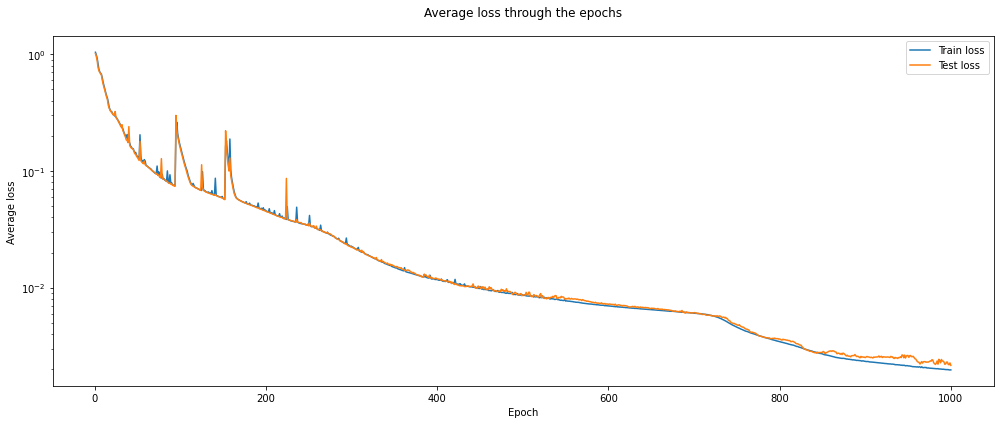

In [8]:
#plot losses
manager.plotLosses()

Predicting:   0%|          | 0/725 [00:00<?, ?it/s]

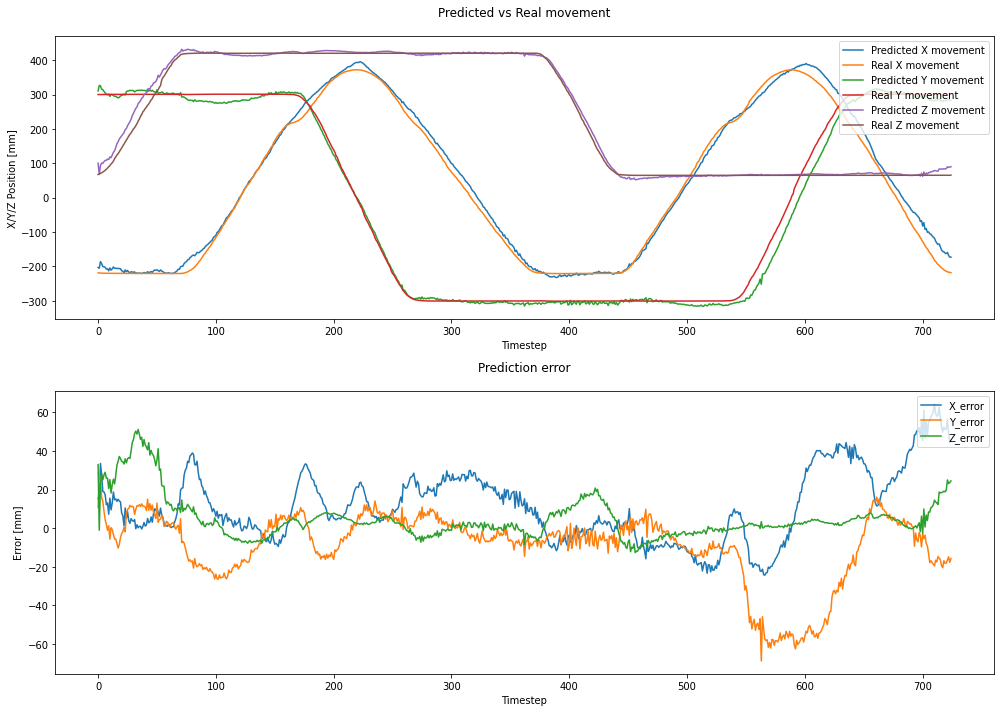

In [9]:
df = pd.read_csv(validation_data_dir+validation_file)
manager.testAccuracy(df)